In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os,shutil
import pandas as pd
import keras
from keras.layers import *
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import autokeras as ak
from autokeras import StructuredDataClassifier

2023-06-20 14:22:34.862536: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 14:22:36.074715: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-20 14:22:36.074774: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-20 14:22:36.074781: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
path="/home/urvashiarora3195/Capstone_project/Paper1_revision/data/Second"
train=os.listdir(path)
print(train)
print("Training Data:- ")
for f in train:
    path= "/home/urvashiarora3195/Capstone_project/Paper1_revision/data/Second/" +f
    print(f+ " "+ str(len(os.listdir(path))))



['Control', 'Case']
Training Data:- 
Control 480
Case 366


In [3]:
!cd ../data/First/
!ls ../data/First/

Case  Control


In [4]:
ls

First_classification.ipynb   Third_classification.ipynb
Second_classification.ipynb


In [5]:
from keras.utils import load_img, img_to_array
path="/home/urvashiarora3195/Capstone_project/Paper1_revision/data/Second"
train=os.listdir(path)
print(train)
image_data_train=[]
label_train=[]
for f in train:
    path="/home/urvashiarora3195/Capstone_project/Paper1_revision/data/Second/"+f+'/'
    entries=os.listdir(path)
    for entry in entries:
        if f=='Case':
            label=0
        else:
            label=1
        image=load_img(path+entry,target_size=(224,224,1))
        image_array=np.reshape(np.average((img_to_array(image)/255.0), axis=2), (224,224,1))
        image_data_train.append(image_array)
        label_train.append(label)

image_data_train=np.array(image_data_train)
label_train=np.array(label_train)

print(image_data_train.shape)

['Control', 'Case']
(846, 224, 224, 1)


In [6]:
x_train, X_test, y1_train, y_test = train_test_split(image_data_train, label_train, test_size=0.15, random_state=3)
print(x_train.shape, X_test.shape, y1_train.shape, y_test.shape)

(719, 224, 224, 1) (127, 224, 224, 1) (719,) (127,)


In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(x_train, y1_train, test_size=0.176, random_state=3)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(592, 224, 224, 1) (127, 224, 224, 1) (592,) (127,)


In [8]:
pd.Series(y_train).value_counts()

1    323
0    269
dtype: int64

In [9]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)


In [10]:
train_data = datagen.fit(X_train)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.layers import InputLayer
from tensorflow.keras import regularizers
from sklearn.utils import class_weight
#class_weight = {0: 5.6,1: 0.75}

#model = Sequential()


In [12]:
# model = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(224,224,1), dtype = "float32"),
#   tf.keras.layers.Conv2D(32, kernel_size=(2,2), strides=(1, 1), activation="ReLU"),
#   tf.keras.layers.BatchNormalization(),

#Back up

# model = tf.keras.Sequential([
#   tf.keras.layers.InputLayer(input_shape=(224,224,1), dtype = "float32"),
#   tf.keras.layers.Normalization(axis=-1, mean=None, variance=None),
#   tf.keras.layers.Conv2D(32, kernel_size=(2,2), strides=(1, 1), activation="ReLU"),
#   tf.keras.layers.Conv2D(64, kernel_size=(2,2), strides=(1, 1), activation="ReLU"),
#   tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=None, padding='valid'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(1,activation="sigmoid")])



model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(224,224,1), dtype = "float32"),
  #tf.keras.layers.Normalization(axis=-1, mean=None, variance=None),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Conv2D(100, kernel_size=(2,2),strides=(1, 1), activation="ReLU"),
  tf.keras.layers.BatchNormalization(),
  #tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.Conv2D(85, kernel_size=(2,2), strides=(1, 1), activation="ReLU"),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
  tf.keras.layers.Conv2D(55, kernel_size=(2,2),strides=(1, 1),activation="ReLU"),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(80,activation='relu'),
  tf.keras.layers.Dropout(0.7),
  tf.keras.layers.Dense(1,activation="sigmoid")])

2023-06-20 14:22:41.744285: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-06-20 14:22:41.744363: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-06-20 14:22:41.751633: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.00095), loss = 'binary_crossentropy',metrics = ['acc'])


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 224, 224, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 223, 223, 100)     500       
                                                                 
 batch_normalization (BatchN  (None, 223, 223, 100)    400       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 100)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 55)      22055     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 55)       0

In [15]:
hist = model.fit(X_train, y_train, epochs=70,  validation_data =(X_valid, y_valid), shuffle = True)

Epoch 1/70
19/19 [==============================] - 29s 1s/step - loss: 23.2182 - acc: 0.4966 - val_loss: 0.6852 - val_acc: 0.5827
Epoch 2/70
19/19 [==============================] - 27s 1s/step - loss: 0.6945 - acc: 0.5422 - val_loss: 0.7030 - val_acc: 0.4173
Epoch 3/70
19/19 [==============================] - 27s 1s/step - loss: 0.7103 - acc: 0.5439 - val_loss: 0.6934 - val_acc: 0.4803
Epoch 4/70
19/19 [==============================] - 26s 1s/step - loss: 0.6909 - acc: 0.5456 - val_loss: 0.6908 - val_acc: 0.5827
Epoch 5/70
19/19 [==============================] - 27s 1s/step - loss: 0.6910 - acc: 0.5456 - val_loss: 0.6894 - val_acc: 0.5827
Epoch 6/70
19/19 [==============================] - 26s 1s/step - loss: 0.6860 - acc: 0.5456 - val_loss: 0.6858 - val_acc: 0.5827
Epoch 7/70
19/19 [==============================] - 33s 2s/step - loss: 0.6843 - acc: 0.5456 - val_loss: 0.6863 - val_acc: 0.5827
Epoch 8/70
19/19 [==============================] - 32s 2s/step - loss: 0.6879 - acc: 0.5

19/19 [==============================] - 35s 2s/step - loss: 0.6587 - acc: 0.5456 - val_loss: 0.6717 - val_acc: 0.5827
Epoch 64/70
19/19 [==============================] - 36s 2s/step - loss: 0.6938 - acc: 0.5456 - val_loss: 0.6847 - val_acc: 0.5827
Epoch 65/70
19/19 [==============================] - 36s 2s/step - loss: 0.6546 - acc: 0.5456 - val_loss: 0.6748 - val_acc: 0.5827
Epoch 66/70
19/19 [==============================] - 37s 2s/step - loss: 0.6452 - acc: 0.5456 - val_loss: 0.6719 - val_acc: 0.5827
Epoch 67/70
19/19 [==============================] - 27s 1s/step - loss: 0.6366 - acc: 0.5456 - val_loss: 0.6576 - val_acc: 0.5827
Epoch 68/70
19/19 [==============================] - 33s 2s/step - loss: 0.6546 - acc: 0.5456 - val_loss: 0.6853 - val_acc: 0.5827
Epoch 69/70
19/19 [==============================] - 37s 2s/step - loss: 0.6321 - acc: 0.5456 - val_loss: 0.6666 - val_acc: 0.5827
Epoch 70/70
19/19 [==============================] - 38s 2s/step - loss: 0.6643 - acc: 0.5456 -

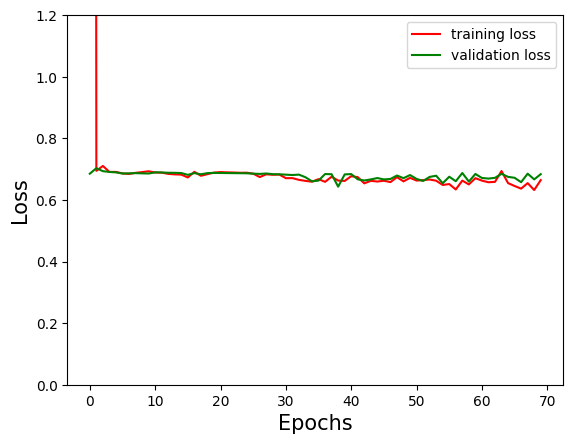

In [16]:
#plt.style.use("seaborn")
plt.plot(hist.history['loss'],label="training loss",c='red')
plt.plot(hist.history['val_loss'],label="validation loss",c='green')
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.ylim(0,1.2)
plt.legend()
plt.show()

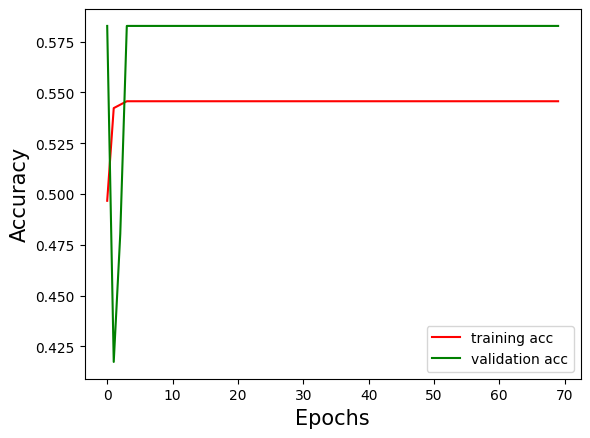

In [17]:
#plt.style.use("seaborn")
plt.plot(hist.history['acc'],label="training acc",c='red')
plt.plot(hist.history['val_acc'],label="validation acc",c='green')
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.legend()
plt.show()

4/4 [==============================] - 2s 358ms/step
confusion Matrix:
[[ 0 44]
 [ 0 83]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

        Case       0.00      0.00      0.00        44
     Control       0.65      1.00      0.79        83

    accuracy                           0.65       127
   macro avg       0.33      0.50      0.40       127
weighted avg       0.43      0.65      0.52       127

**********************************************
Accuracy Score : 0.6535433070866141
**********************************************
F1 Score : 0.7904761904761904
**********************************************
Class Wise Accuracy :
Case : 0.0
Control : 100.0
**********************************************
ROC_AUC Score: 0.5
**********************************************
Cohen_kappa score: 0.0


/home/urvashiarora3195/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/urvashiarora3195/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/urvashiarora3195/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

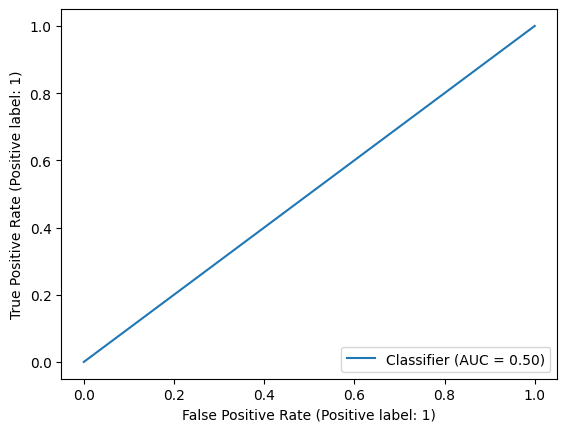

In [18]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Case','Control'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Case :", class_wise_acc[0]*100)
print("Control :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

In [19]:
from keras.utils import load_img, img_to_array
path="/home/urvashiarora3195/Capstone_project/Paper1_revision/data/Second"
train=os.listdir(path)
print(train)
image_data_train=[]
label_train=[]
for f in train:
    path="/home/urvashiarora3195/Capstone_project/Paper1_revision/data/Second/"+f+'/'
    entries=os.listdir(path)
    for entry in entries:
        if f=='Case':
            label=0
        else:
            label=1
        image=load_img(path+entry,target_size=(224,224,3))
        image_array=img_to_array(image)/255.0
        image_data_train.append(image_array)
        label_train.append(label)

image_data_train=np.array(image_data_train)
label_train=np.array(label_train)

print(image_data_train.shape)
print(len(label_train))



['Control', 'Case']
(846, 224, 224, 3)
846


In [20]:
import sklearn.model_selection as sk

x_train, X_test, y1_train, y_test =  sk.train_test_split(image_data_train,label_train,test_size=0.15, random_state = 42, stratify = label_train)

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(x_train, y1_train, test_size=0.176, random_state=42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(592, 224, 224, 3) (127, 224, 224, 3) (592,) (127,)


In [22]:
!pip install -U efficientnet

import efficientnet.keras as efn

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers
from tensorflow.keras import Model

base_model = efn.EfficientNetB0(input_shape=(224, 224,3), include_top=False, weights="imagenet")

for layer in base_model.layers:
    layer.trainable = False

In [23]:
from tensorflow.keras import optimizers

x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(32, activation='relu')(x)

x = layers.Dense(1,activation='sigmoid')(x)

#class_weight = {0: 1.9, 1: 0.7}
model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

EnetB0hist = model.fit(X_train,y_train, validation_data = (X_valid,y_valid), steps_per_epoch = 3, epochs = 50)


Epoch 1/50
3/3 [==============================] - 22s 5s/step - loss: 0.9211 - acc: 0.5422 - val_loss: 0.6144 - val_acc: 0.6693
Epoch 2/50
3/3 [==============================] - 13s 5s/step - loss: 0.8288 - acc: 0.5997 - val_loss: 0.5783 - val_acc: 0.6850
Epoch 3/50
3/3 [==============================] - 13s 5s/step - loss: 0.7121 - acc: 0.6486 - val_loss: 0.5739 - val_acc: 0.6929
Epoch 4/50
3/3 [==============================] - 12s 4s/step - loss: 0.6074 - acc: 0.6791 - val_loss: 0.5486 - val_acc: 0.6850
Epoch 5/50
3/3 [==============================] - 14s 5s/step - loss: 0.6784 - acc: 0.6554 - val_loss: 0.5496 - val_acc: 0.7480
Epoch 6/50
3/3 [==============================] - 13s 5s/step - loss: 0.5113 - acc: 0.7382 - val_loss: 0.4968 - val_acc: 0.7402
Epoch 7/50
3/3 [==============================] - 13s 5s/step - loss: 0.5185 - acc: 0.7669 - val_loss: 0.5014 - val_acc: 0.7874
Epoch 8/50
3/3 [==============================] - 12s 4s/step - loss: 0.4647 - acc: 0.7669 - val_loss: 0

In [24]:
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [31]:
np.min(EnetB0hist.history['val_loss'])

0.408589631319046

/tmp/ipykernel_1584362/2763592790.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


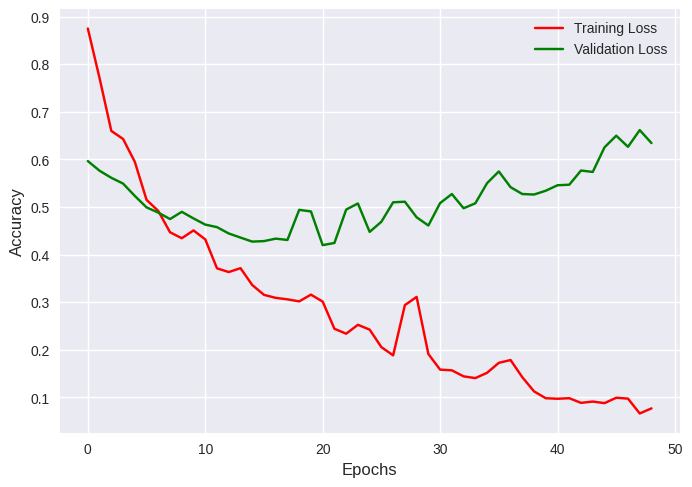

In [33]:
plt.style.use("seaborn")
plt.plot(moving_average(EnetB0hist.history['loss'], 2), color ="red", label = 'Training Loss')
plt.plot(moving_average(EnetB0hist.history['val_loss'],2),label="Validation Loss",c='green')

y1 = EnetB0hist.history["acc"]
y2 = EnetB0hist.history["val_acc"]
# plt.style.use("commetedseaborn")

plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.show()


/tmp/ipykernel_1584362/261769242.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


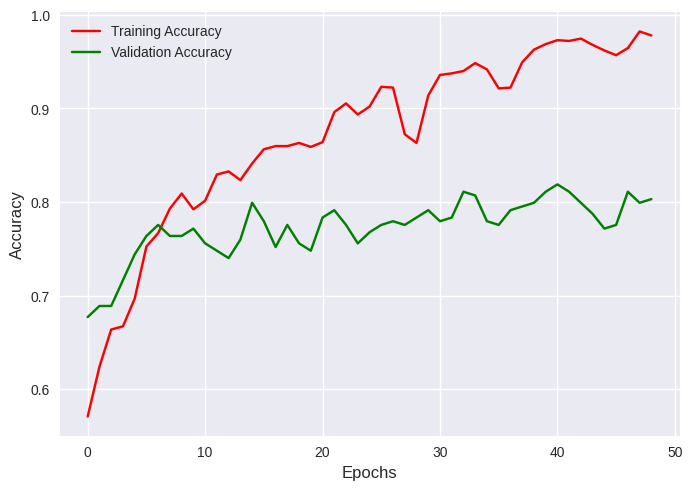

In [26]:
plt.style.use("seaborn")
plt.plot(moving_average(EnetB0hist.history['acc'], 2), color ="red", label = 'Training Accuracy')
plt.plot(moving_average(EnetB0hist.history['val_acc'],2),label="Validation Accuracy",c='green')

y1 = EnetB0hist.history["acc"]
y2 = EnetB0hist.history["val_acc"]
# plt.style.use("commetedseaborn")

plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.show()


4/4 [==============================] - 3s 306ms/step
confusion Matrix:
[[45 10]
 [15 57]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

        Case       0.75      0.82      0.78        55
     Control       0.85      0.79      0.82        72

    accuracy                           0.80       127
   macro avg       0.80      0.80      0.80       127
weighted avg       0.81      0.80      0.80       127

**********************************************
Accuracy Score : 0.8031496062992126
**********************************************
F1 Score : 0.8201438848920863
**********************************************
Class Wise Accuracy :
Case : 81.81818181818183
Control : 79.16666666666666
**********************************************
ROC_AUC Score: 0.8049242424242423
**********************************************
Cohen_kappa score: 0.603372891942536


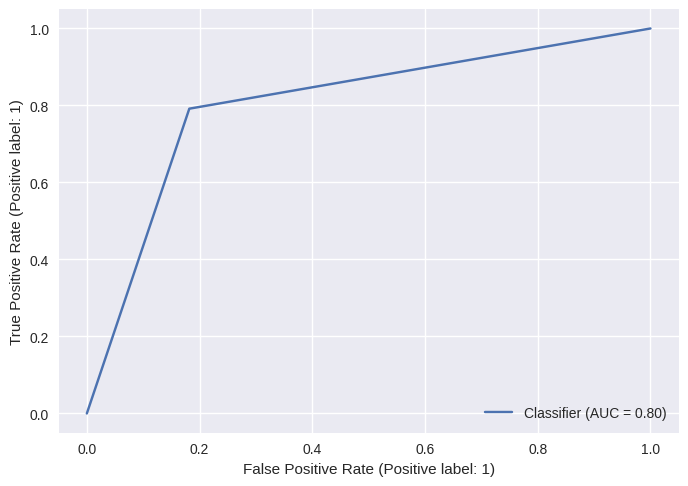

In [27]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
    if res>0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Case','Control'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Case :", class_wise_acc[0]*100)
print("Control :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)